## Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.


On this personality tests, do left-handed people report different emotional reactions than right-handed people?


Is there a difference in personality test
between left-handed and right-handed individuals as measured by survey responses?


In most cases, these children using left hand have difficulties in oral and written language skills, numeracy, and mathematical operations.
#What is the psychology of left-handedness?
#In most cases, these children have difficulties in mastering oral and written language skills, numeracy and mathematical operations.


---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [138]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV



In [139]:
# Read CSV file (seperate by \t)
data = pd.read_csv('./data.csv', sep='\t')

In [140]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [141]:
data.shape

(4184, 56)

In [142]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [143]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


In [144]:
# " Is English you native language?" 1=Yes, 2=No (1   = 3130 , 2   = 1029) Don't answer =25 

data['engnat'].value_counts()

engnat
1    3130
2    1029
0      25
Name: count, dtype: int64

In [145]:
# 1=Less than high school(546), 2=High school (2055), 3=University degree(1086), 4=Graduate degree(446)
# O= Don't answer
data['education'].value_counts()

education
2    2055
3    1086
1     546
4     446
0      51
Name: count, dtype: int64

In [146]:
# How much people to answer all of questionair using the left or write hands  ?
# Don't answer (0) = 11
# Right hand (1)= 3542
# Left hand (2) = 452
# Both hand (3) = 179
data['hand'].value_counts()

hand
1    3542
2     452
3     179
0      11
Name: count, dtype: int64

In [147]:
#gender	1=Male=1557, 2=Female =2175, 3=Other=299 , 0=Don't answer
data['gender'].value_counts()

gender
2    2212
1    1586
3     304
0      82
Name: count, dtype: int64

In [148]:
#orientation	1=Heterosexual=2270, 2=Bisexual=819, 3=Homosexual=332, 4=Asexual=332, 5=Other=342 , 0= 102
data['orientation'].value_counts()

orientation
1    2307
2     833
5     349
3     335
4     237
0     123
Name: count, dtype: int64

In [149]:
data.drop(data[data['hand'] == 0].index,inplace=True)
data.drop(data[data['engnat'] == 0].index,inplace=True)
data.drop(data[data['education'] == 0].index,inplace=True)

In [150]:

data.shape


(4098, 56)

In [151]:
data.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

In [152]:
df = data

In [153]:
#df = df.drop(['country'], axis=1)

In [154]:
df.dtypes

Q1              int64
Q2              int64
Q3              int64
Q4              int64
Q5              int64
Q6              int64
Q7              int64
Q8              int64
Q9              int64
Q10             int64
Q11             int64
Q12             int64
Q13             int64
Q14             int64
Q15             int64
Q16             int64
Q17             int64
Q18             int64
Q19             int64
Q20             int64
Q21             int64
Q22             int64
Q23             int64
Q24             int64
Q25             int64
Q26             int64
Q27             int64
Q28             int64
Q29             int64
Q30             int64
Q31             int64
Q32             int64
Q33             int64
Q34             int64
Q35             int64
Q36             int64
Q37             int64
Q38             int64
Q39             int64
Q40             int64
Q41             int64
Q42             int64
Q43             int64
Q44             int64
introelapse     int64
testelapse

---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [157]:
df = df.drop(['country', 'introelapse','testelapse','fromgoogle','age',
              'gender','race', 'engnat','education','orientation','religion'], axis=1)

In [158]:
 corr = df[df['hand'] == 2].corr().sort_values('hand', ascending=False)

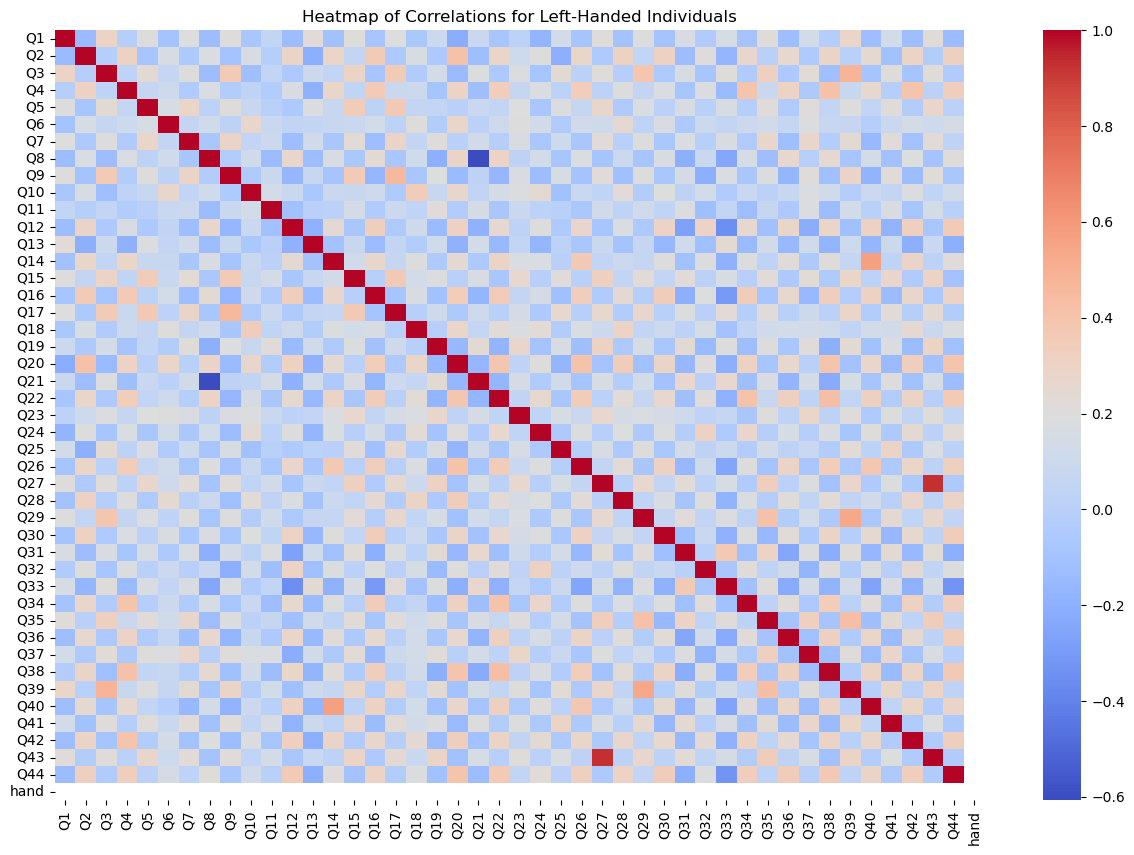

In [159]:


plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Heatmap of Correlations for Left-Handed Individuals")
plt.show()

#Q43	I think a natural disaster would be kind of exciting.
#Q27	I think a natural disaster would be kind of exciting.
# It is the same question


#Q21	I do not remember birthdays.
#Q8	    I know the birthdays of my friends.


In [289]:
corr_matrix = df.corr(numeric_only=True) #.abs()
correlations = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
correlations.unstack().sort_values(ascending=False).dropna()

Q43  Q27    0.918824
Q40  Q14    0.610417
Q39  Q3     0.494399
     Q29    0.462946
Q9   Q3     0.426725
              ...   
Q40  Q33   -0.230152
Q31  Q12   -0.266095
Q44  Q33   -0.270043
Q33  Q12   -0.297063
Q21  Q8    -0.694382
Length: 990, dtype: float64

In [295]:
df.corr(numeric_only=True)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,hand
Q1,1.000000,-0.122368,0.273658,-0.059913,0.199639,-0.075995,0.170105,-0.131277,0.241191,-0.061123,...,-0.072814,0.175601,-0.057751,0.291621,-0.075073,0.169353,-0.061815,0.205602,-0.095136,0.051249
Q2,-0.122368,1.000000,-0.024497,0.265940,-0.048874,0.158955,-0.089110,0.146762,-0.097631,0.149334,...,0.199755,-0.081120,0.233043,-0.046132,0.244295,-0.114703,0.229375,-0.016140,0.290369,-0.014824
Q3,0.273658,-0.024497,1.000000,0.068061,0.273445,-0.015959,0.219657,-0.121213,0.426725,-0.033802,...,-0.012919,0.236536,-0.034385,0.494399,-0.043065,0.216393,0.000934,0.270632,-0.006664,0.057218
Q4,-0.059913,0.265940,0.068061,1.000000,0.062713,0.079765,-0.041224,0.150837,-0.069496,0.054506,...,0.239243,-0.063877,0.373529,0.022525,0.219296,-0.023259,0.330375,0.012668,0.340318,0.037041
Q5,0.199639,-0.048874,0.273445,0.062713,1.000000,0.079975,0.254912,-0.049934,0.230949,0.008627,...,-0.021747,0.175287,0.029226,0.240598,-0.008853,0.204967,0.012866,0.259737,0.008361,0.037913
Q6,-0.075995,0.158955,-0.015959,0.079765,0.079975,1.000000,0.016819,0.086351,-0.034457,0.198241,...,0.012299,0.079639,0.043227,-0.008775,-0.012556,0.030715,0.121697,0.038621,0.113094,-0.027519
Q7,0.170105,-0.089110,0.219657,-0.041224,0.254912,0.016819,1.000000,-0.069126,0.253272,-0.023031,...,-0.084684,0.177122,-0.074165,0.208850,-0.086132,0.169527,-0.050175,0.187449,-0.061153,0.040741
Q8,-0.131277,0.146762,-0.121213,0.150837,-0.049934,0.086351,-0.069126,1.000000,-0.089427,0.039548,...,0.207893,-0.109924,0.237962,-0.147783,0.180336,-0.098444,0.159535,-0.124941,0.163824,-0.021528
Q9,0.241191,-0.097631,0.426725,-0.069496,0.230949,-0.034457,0.253272,-0.089427,1.000000,0.004743,...,-0.059805,0.263516,-0.122190,0.357442,-0.107144,0.188549,-0.070532,0.256508,-0.080110,0.027116
Q10,-0.061123,0.149334,-0.033802,0.054506,0.008627,0.198241,-0.023031,0.039548,0.004743,1.000000,...,0.034826,0.086434,0.049563,-0.025504,0.045189,-0.030357,0.133403,0.024104,0.095441,-0.032414


In [160]:
#df['age'].unique()
#found data error drop the mistake values

In [161]:
#df.drop(data[data['age'] >100].index,inplace=True)

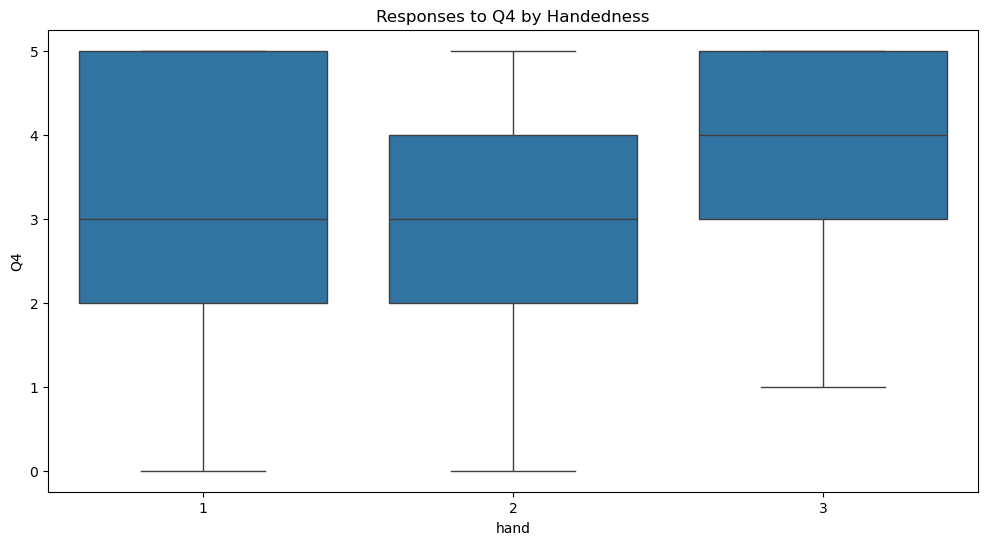

In [162]:

lfhanded_means = df.groupby('hand').mean().iloc[:, :44]
plt.figure(figsize=(12, 6))
sns.boxplot(x='hand', y='Q4', data=df)
plt.title('Responses to Q4 by Handedness')
plt.show()


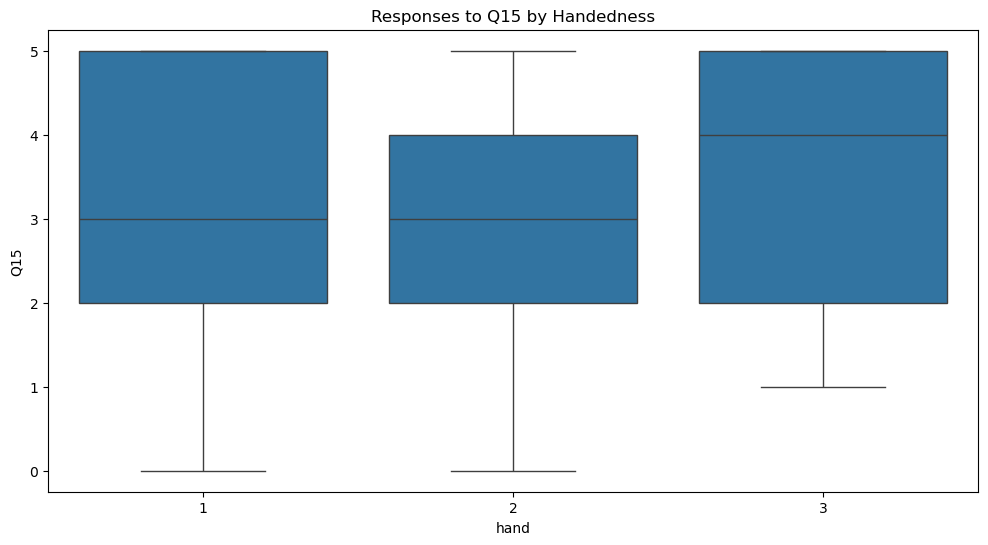

In [163]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hand', y='Q15', data=df) 
plt.title('Responses to Q15 by Handedness')
plt.show()

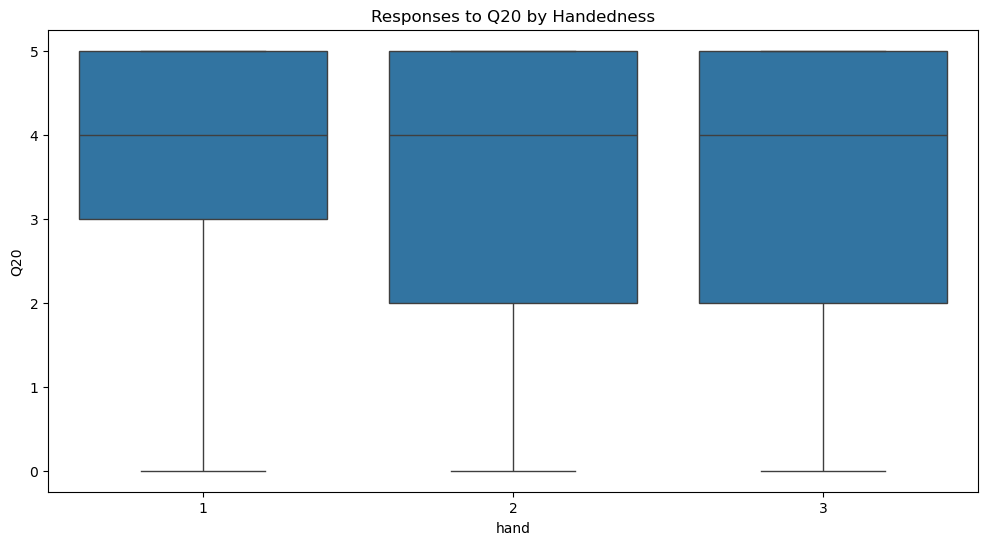

In [164]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hand', y='Q20', data=df) 
plt.title('Responses to Q20 by Handedness')
plt.show()

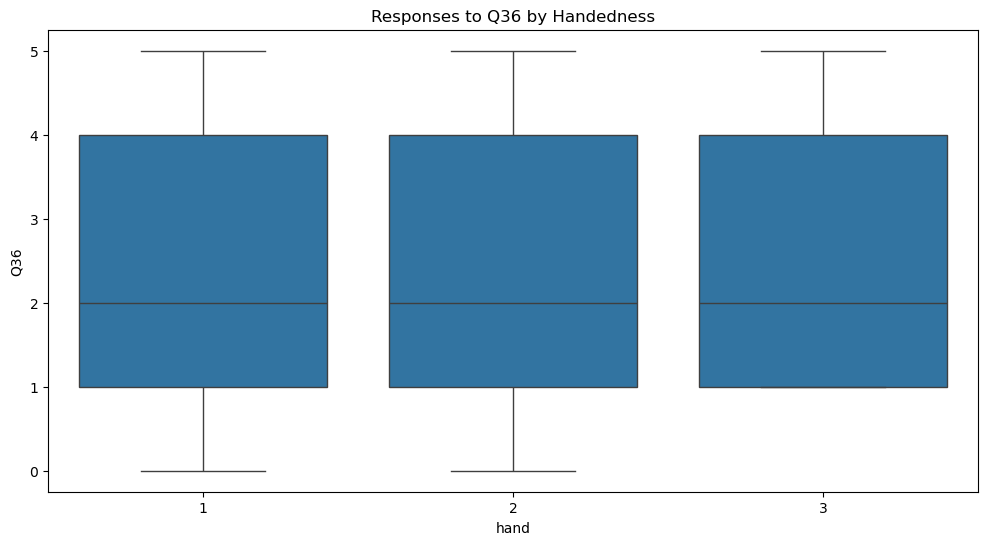

In [165]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hand', y='Q36', data=df) 
plt.title('Responses to Q36 by Handedness')
plt.show()

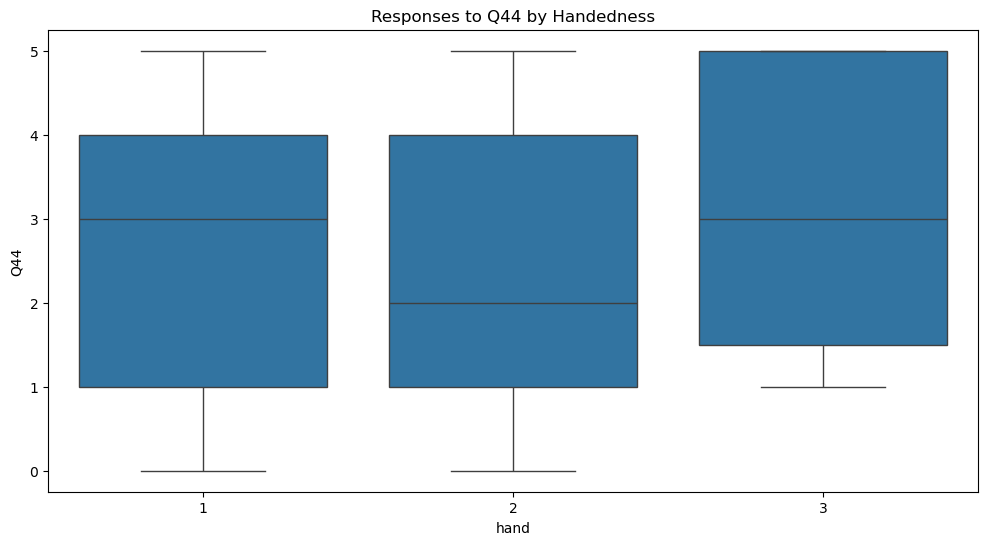

In [166]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hand', y='Q44', data=df)
plt.title('Responses to Q44 by Handedness')
plt.show()

In [167]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,hand
0,4,1,5,1,5,1,5,1,4,1,...,1,1,1,5,5,5,1,5,1,3
1,1,5,1,4,2,5,5,4,1,5,...,4,4,4,1,3,1,4,4,5,1
2,1,2,1,1,5,4,3,2,1,4,...,2,4,2,1,4,2,2,2,2,2
3,1,4,1,5,1,4,5,4,3,5,...,1,3,4,1,2,1,1,1,3,2
4,5,1,5,1,5,1,5,1,3,1,...,1,1,1,5,5,5,1,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,3,5,4,5,2,4,2,2,2,5,...,3,4,3,4,2,3,4,2,5,1
4180,1,5,1,5,1,4,2,4,1,4,...,5,2,4,1,5,1,1,1,4,1
4181,3,2,2,4,5,4,5,2,2,5,...,1,5,1,2,2,5,1,2,1,1
4182,1,3,4,5,1,3,3,1,1,3,...,1,1,1,1,5,5,1,3,3,1


           Q15       Q20      hand
Q15   1.000000 -0.034598  0.016473
Q20  -0.034598  1.000000 -0.033492
hand  0.016473 -0.033492  1.000000


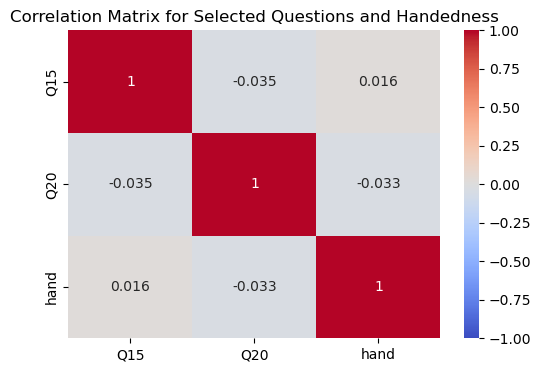

In [168]:
emotional_q = ['Q15', 'Q20', 'hand']
df_subset = df[emotional_q]

corr_emotional_q = df_subset.corr()

print(corr_emotional_q)


plt.figure(figsize=(6, 4))
sns.heatmap(corr_emotional_q, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Selected Questions and Handedness")
plt.show()

### Calculate and interpret the baseline accuracy rate:

In [170]:
data['hand'].value_counts(normalize=True).mul(100)

hand
1    84.895071
2    10.932162
3     4.172767
Name: proportion, dtype: float64

In [171]:

from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
# feature table
X = df.drop(columns='hand')

# the target variable
y = df[['hand']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_train, y_train)
y_train.value_counts()
dummy_clf.predict(X_train)
dummy_clf.score(X_test, y_test)


#Baseline: A simple machine learning algorithm based on simple rules of thumb. 
#For example,most frequent baseline: always predicts the most frequent label in the training set.
#approximately 84.39% of all predictions were correct
#reference https://bait509-ubc.github.io/BAIT509/lectures/lecture3.html

0.8439024390243902

### Short answer questions:

In this lab, you'll use K-nearest neighbors and logistic regression to model handedness based on psychological factors. 

Answer the following related questions; your answers may be in bullet points.

#### Describe the difference between regression and classification problems:

# Answer here:
A regression algorithm can predict a discrete value which is in the form of an integer quantity
Classification - this is when our y-variable is a category. If it’s a 0/1 yes/no kind of
variable, we often call it binary classification. Otherwise, multiclass classification.

#### Considering $k$-nearest neighbors, describe the relationship between $k$ and the bias-variance tradeoff:

In [175]:
# Answer here:
#either high bias or high variance based on the number of K selected
# Or, and this is your preference, you hit the proverbial sweet spot, and avoid much of either

# The choice of k affects the bias-variance tradeoff:
# High variance (overfitting) concerns - memorizes training data
# Balanced - attempting to find sweet spot between bias and variance
# High bias (underfitting) - too much smoothing



#The bias-variance tradeoff:
#The bias-variance trade off is the trade off between underfitting and overfitting. 
#The goal of building a good machine learning model should be a balance between bias and 
#variance: good enough to get accurate predictions but general enough to perform well on unseen data.

#### Why do we often standardize predictor variables when using $k$-nearest neighbors?

In [177]:
# Answer here:
# Standardizing predictor variables in KNN use to ensures consistent feature scaling.

#### Do you think we should standardize the explanatory variables for this problem? Why or why not?

#### How do we settle on $k$ for a $k$-nearest neighbors model?

In [319]:
# Answer here:
#using the  cross-validation can help to optimize the k that best balances bias and variance


#### What is the default type of regularization for logistic regression as implemented in scikit-learn? (You might [check the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).)

In [183]:
# Answer here:

# penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’ 
#'l2': add a L2 penalty term and it is the default choice;

#### Describe the relationship between the scikit-learn `LogisticRegression` argument `C` and regularization strength:


#### Describe the relationship between regularization strength and the bias-variance tradeoff:

#### Logistic regression is considered more interpretable than $k$-nearest neighbors. Explain why.

In [187]:
# Answer here:

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your features should be:

In [189]:
X = df.drop(columns='hand')
y = df[['hand']]

#### Create and fit four separate $k$-nearest neighbors models: 
- one with $k = 3$
- one with $k = 5$
- one with $k = 15$
- one with $k = 25$:

In [297]:
# Now we'll set the `stratify` parameter to `y` --> useful in classification
# Enforces a strict split between train and test of the various class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [299]:
# Instantiate the Scaler object
sc = StandardScaler()

# Here we fit and transform on the X_train data and assign to a new variable called `X_train_sc` (Skip Z_train this time)
X_train_sc = sc.fit_transform(X_train)
# Values of X_train - subtracting mean of X_train / standard of X_train

# Fit only to X_train, only transforms X_test
X_test_sc= sc.transform(X_test)


In [301]:
k_values = [3, 5, 10, 20]
models = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train.values.ravel())
    models[k] = knn
  
    y_pred = knn.predict(X_test_sc)

    scores = cross_val_score(knn, X, y.values.ravel(), cv=5)  
    
    print(f'Cross-validation scores for k={k}: {scores}')
    print(f"Training Score k={k}: {knn.score(X_train_sc, y_train.values.ravel())}")
    print(f"Testing Score k={k}: {knn.score(X_test_sc, y_test.values.ravel())}")

Cross-validation scores for k=3: [0.81585366 0.81585366 0.80731707 0.81684982 0.7973138 ]
Training Score k=3: 0.8685323787829483
Testing Score k=3: 0.8058536585365854
Cross-validation scores for k=5: [0.83902439 0.84146341 0.82804878 0.83394383 0.82661783]
Training Score k=5: 0.8493328994467947
Testing Score k=5: 0.8302439024390244
Cross-validation scores for k=10: [0.84634146 0.84634146 0.84878049 0.84737485 0.84615385]
Training Score k=10: 0.8486820696387894
Testing Score k=10: 0.8478048780487805
Cross-validation scores for k=20: [0.84756098 0.84878049 0.84878049 0.84981685 0.84981685]
Training Score k=20: 0.8490074845427921
Testing Score k=20: 0.848780487804878


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. 

Are any of your models overfit or underfit? 

Do any of your models beat the baseline accuracy rate?

---

## Step 4 & 5 Modeling: logistic regression

#### Create and fit four separate logistic regression models: one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

Note: You can use the same train and test data as used above with kNN.

In [303]:
# penalty='l2' - Ridge
# L2 is Ridge, L1 is referred to Lasso

# penalty : {'l1', 'l2', 'elasticnet', None}, default='l2'
    # Specify the norm of the penalty:

    # - `None`: no penalty is added;
    # - `'l2'`: add a L2 penalty term and it is the default choice;
    # - `'l1'`: add a L1 penalty term;
    # - `'elasticnet'`: both L1 and L2 penalty terms are added.

ls1 = LogisticRegression(penalty='l1', solver='liblinear',C=1.0)
ls10 = LogisticRegression(penalty='l1', solver='liblinear',C=10.0)
ridge1 = LogisticRegression(penalty='l2', C=1.0)
ridge10 = LogisticRegression(penalty='l2', C=10.0)

In [305]:
y_train.value_counts()

hand
1       2609
2        336
3        128
Name: count, dtype: int64

In [307]:
ls1.fit(X_train_sc, y_train.values.ravel())
y_ls1_predict = ls1.predict(X_test_sc)
ls10.fit(X_train_sc, y_train.values.ravel())
y_ls10_predict = ls10.predict(X_test_sc)

In [309]:
ridge1.fit(X_train_sc, y_train.values.ravel())
y_r1_predict = ridge1.predict(X_test_sc)

ridge10.fit(X_train_sc, y_train.values.ravel())
y_r10_predict = ridge10.predict(X_test_sc)

In [311]:


print(f'lasso alpha1 {ls1.score(X_train_sc, y_train.values.ravel())}')
print(f'lasso alpha10 {ls10.score(X_train_sc, y_train.values.ravel())}')
print(f'ridge alpha1 {ridge1.score(X_train_sc, y_train.values.ravel())}')
print(f'ridge alpha10 {ridge10.score(X_train_sc, y_train.values.ravel())}')

#https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected

lasso alpha1 0.8490074845427921
lasso alpha10 0.8490074845427921
ridge alpha1 0.8490074845427921
ridge alpha10 0.8490074845427921


In [313]:
ls1 = LogisticRegression(penalty='l1', solver='liblinear',C=1.0)
ls1.fit(X_train_sc, y_train.values.ravel())
print(f'lasso alpha1 {ls1.score(X_train_sc, y_train.values.ravel())}')

lasso alpha1 0.8490074845427921


In [315]:
ridge1 = LogisticRegression(penalty='l2', C=0.001)
ridge1.fit(X_train_sc, y_train.values.ravel())
print(f'ridge alpha1 {ridge1.score(X_train_sc, y_train.values.ravel())}')

ridge alpha1 0.8490074845427921


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. 

Are any of your models overfit or underfit? 

Do any of your models beat the baseline accuracy rate?

---

## Step 6: Answer the problem.

Are any of your models worth moving forward with? 

What are the "best" models?